In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [3]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


<Axes: xlabel='GrLivArea'>

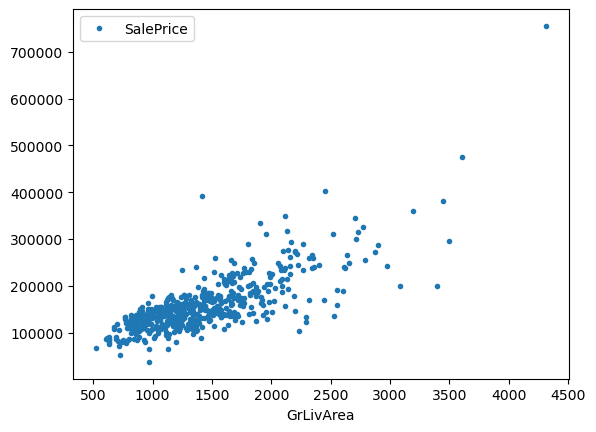

In [4]:
data.plot(x='GrLivArea', y='SalePrice',style='.')

In [16]:
n = len(data)
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()
print(x, '\n')
print('data size:', n)

[1262 2090 1077  912  854 1004 1339 1108 1060 1060  900 1600  520 1228
 1297 1057 1328  884  938 1150  955 1470 1176  780 1111 1710  747 2223
  845 1086 1605  952 1230 2142  964 2291 1470 1610 1047 1517 1844 2320
 1080  754  840 1053 2157 1327 1721 1682  875  969 1252 1040 1232  882
 1616 1355 1707 1382 1767 2158  968 1802 1340 1252 3608 1656 2727 1479
  864 1456 2229 1279 1310 1284 1092  864 1392 1236 1954 1552  864  987
 1194  894 1744  866 1217 1928 2144 1302 1314 1212 1316 1422 2192  778
 1113 1363 2270 1632  816 1548 1982 1734 1396 1716 2263 1003 1743 1152
  894 3493 1406  972 1118 1641 2353 1163 2978  803 2134 1056 1786 1621
 1215  958 1111  720 1167  912  987 1344 1268 1287 1319 1691 1125 1367
  882 1034 1144  672 1680 1028 1400 2624 1134 1056 1602 1389  907 1198
  630 1661 1118  904  694 1196 1573 1888 1376 1183  813 1242 1663 1666
 1135 1660 1644 1969  970 1131 1826  999 1113 1073 1484  630 1304 1578
 1269  886 1820  899  912 1214 1801 1378 1041 1363 2119 2080 1294 1244
 1664 

y = 87.688145 * x + 34754.077892


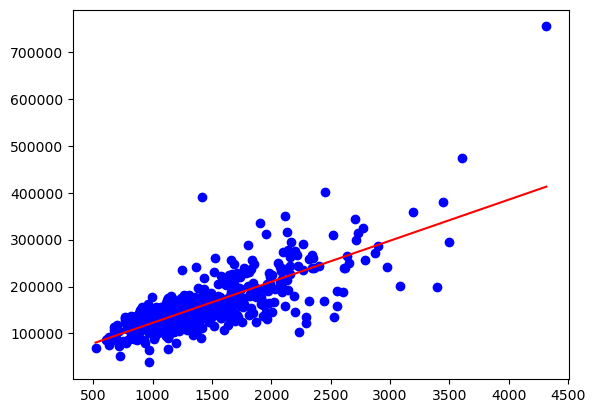

In [6]:
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)
denominator = n * sum_x2 - sum_x * sum_x
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')
plot_data(x,y,m,b)


In [8]:
def model(x,m,b):
   return m * x + b
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

y_i = 5.00 * x + 1000.00
first 10 loss values:  [3.03421561e+10 3.55511025e+10 1.24579082e+10 1.91656336e+10
 1.60604929e+10 2.04432804e+10 1.72410030e+10 1.76517796e+10
 1.52769600e+10 2.18152900e+10]
y_i = 5.47 * x + 1000.00     previously calculated: y_i = 87.69 * x + 34754.08


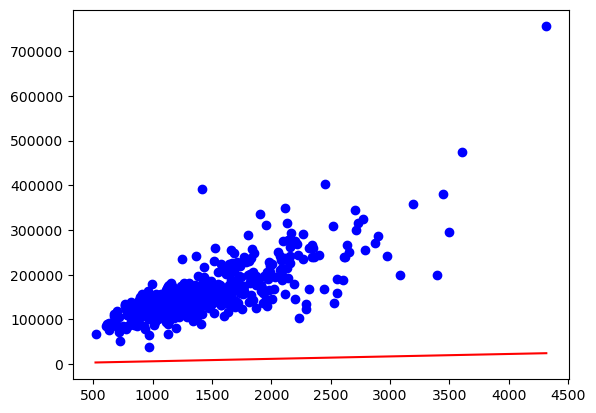

In [9]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

m = 5.
b = 1000.
print('y_i = %.2f * x + %.2f' % (m,b))

l = loss(x,y,m,b)
print('first 10 loss values: ',l[:10])

learning_rate = 1e-9
m = updated_m(x,y,m,b,learning_rate)
b = updated_b(x,y,m,b,learning_rate)
print('y_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f' % (m,b,m_calc,b_calc))
plot_data(x,y,m,b)



[515]  dy_i = 84.60 * x + 33974.42     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1121110816.928493


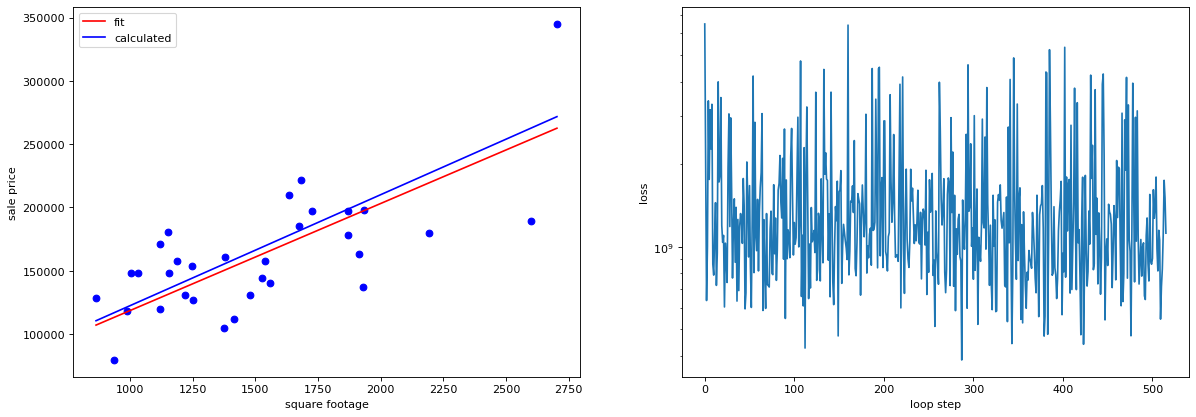

In [19]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []

batch_size = 32
# we run our loop N times

loop_N = 30*len(data) // batch_size
for i in range(loop_N):
   
   # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
   data_batch = data.sample(batch_size)
   data_x = data_batch['GrLivArea'].to_numpy()
   data_y = data_batch['SalePrice'].to_numpy()
   
   # update our slope and intercept based on the current values
   m = updated_m(data_x,data_y,m,b,learning_rate_m)
   b = updated_b(data_x,data_y,m,b,learning_rate_b)

   # calculate the loss value
   loss_value = np.mean(loss(data_x,data_y,m,b))

   # keep a history of our loss values
   loss_history.append(loss_value)

   # print our progress
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
   
   # close/delete previous plots
   plt.close('all')
   
   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   # lot our usual output
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss 
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y)
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()
   # gives us time to see the plot
   time.sleep(2.5)
   # clears the plot when the next plot is ready to show.
   ipydis.clear_output(wait=True)

[257]  dy_i = 86.95 * x + 32970.81     previously calculated: y_i = 87.69 * x + 34754.08    loss: 812949748.870981


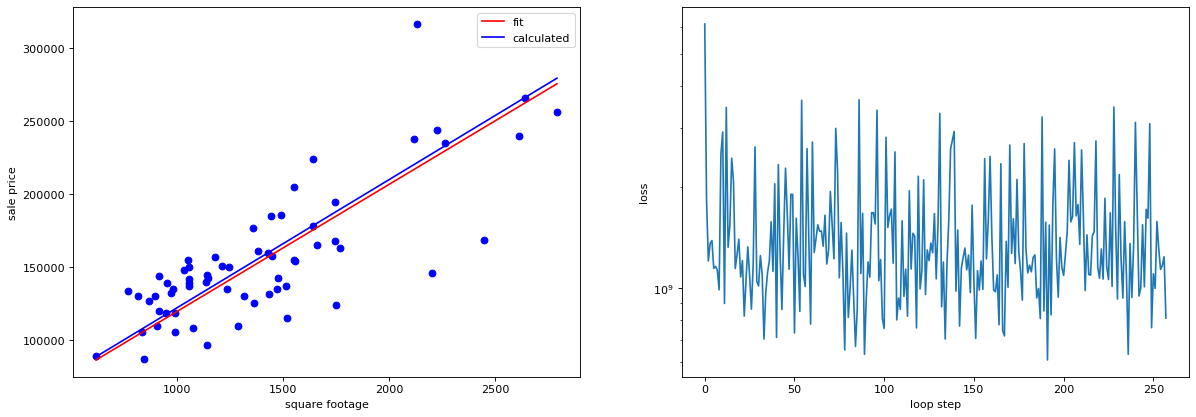

In [25]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []

batch_size = 64
# we run our loop N times

loop_N = 30*len(data) // batch_size
print ('loop step is equal to', loop_N)
for i in range(loop_N):
   
   # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
   data_batch = data.sample(batch_size)
   data_x = data_batch['GrLivArea'].to_numpy()
   data_y = data_batch['SalePrice'].to_numpy()
   
   # update our slope and intercept based on the current values
   m = updated_m(data_x,data_y,m,b,learning_rate_m)
   b = updated_b(data_x,data_y,m,b,learning_rate_b)

   # calculate the loss value
   loss_value = np.mean(loss(data_x,data_y,m,b))

   # keep a history of our loss values
   loss_history.append(loss_value)

   # print our progress
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
   
   # close/delete previous plots
   plt.close('all')
   
   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   # lot our usual output
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss 
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y)
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()
   # gives us time to see the plot
   time.sleep(2.5)
   # clears the plot when the next plot is ready to show.
   ipydis.clear_output(wait=True)


[128]  dy_i = 88.21 * x + 31526.70     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1298767353.139594


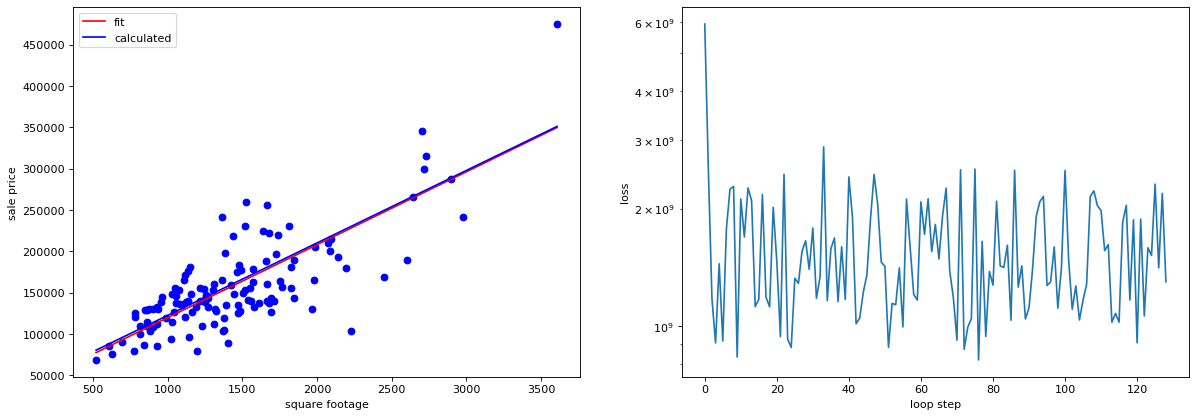

In [26]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []

batch_size = 128
# we run our loop N times

loop_N = 30*len(data) // batch_size
print ('loop step is equal to', loop_N)
for i in range(loop_N):
   
   # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
   data_batch = data.sample(batch_size)
   data_x = data_batch['GrLivArea'].to_numpy()
   data_y = data_batch['SalePrice'].to_numpy()
   
   # update our slope and intercept based on the current values
   m = updated_m(data_x,data_y,m,b,learning_rate_m)
   b = updated_b(data_x,data_y,m,b,learning_rate_b)

   # calculate the loss value
   loss_value = np.mean(loss(data_x,data_y,m,b))

   # keep a history of our loss values
   loss_history.append(loss_value)

   # print our progress
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
   
   # close/delete previous plots
   plt.close('all')
   
   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   # lot our usual output
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss 
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y)
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()
   # gives us time to see the plot
   time.sleep(2.5)
   # clears the plot when the next plot is ready to show.
   ipydis.clear_output(wait=True)

[063]  dy_i = 88.83 * x + 33799.71     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1954013813.126265


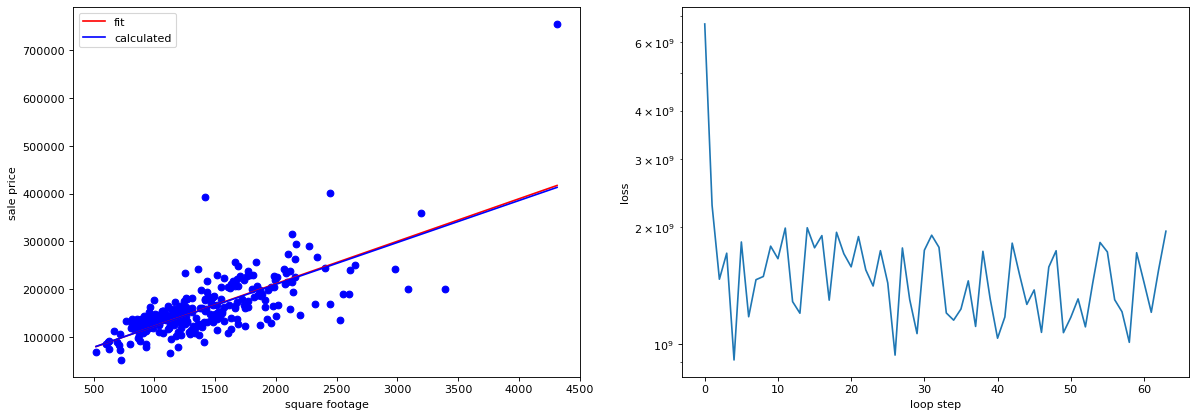

In [27]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []

batch_size = 256
# we run our loop N times

loop_N = 30*len(data) // batch_size
print ('loop step is equal to', loop_N)
for i in range(loop_N):
   
   # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
   data_batch = data.sample(batch_size)
   data_x = data_batch['GrLivArea'].to_numpy()
   data_y = data_batch['SalePrice'].to_numpy()
   
   # update our slope and intercept based on the current values
   m = updated_m(data_x,data_y,m,b,learning_rate_m)
   b = updated_b(data_x,data_y,m,b,learning_rate_b)

   # calculate the loss value
   loss_value = np.mean(loss(data_x,data_y,m,b))

   # keep a history of our loss values
   loss_history.append(loss_value)

   # print our progress
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
   
   # close/delete previous plots
   plt.close('all')
   
   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   # lot our usual output
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss 
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y)
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()
   # gives us time to see the plot
   time.sleep(2.5)
   # clears the plot when the next plot is ready to show.
   ipydis.clear_output(wait=True)

[031]  dy_i = 88.60 * x + 33198.05     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1495046108.899009


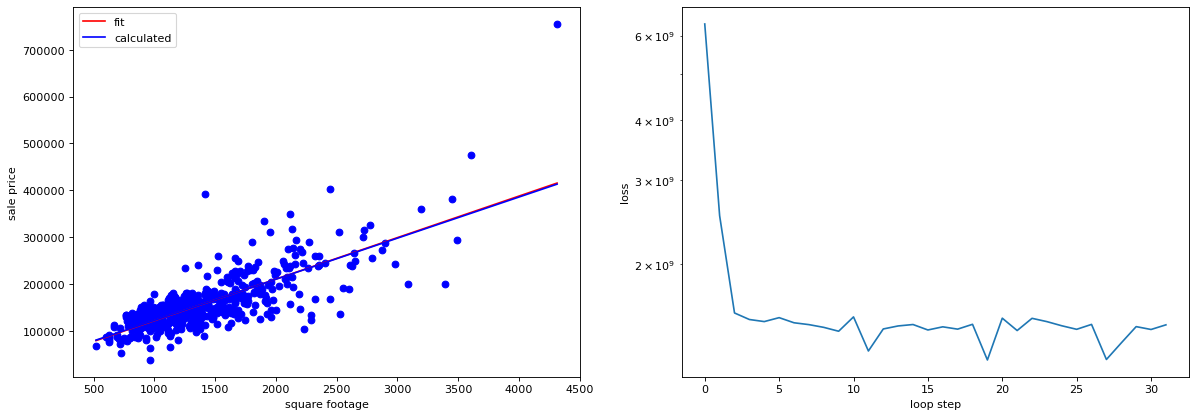

In [28]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []

batch_size = 512
# we run our loop N times

loop_N = 30*len(data) // batch_size
print ('loop step is equal to', loop_N)
for i in range(loop_N):
   
   # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
   data_batch = data.sample(batch_size)
   data_x = data_batch['GrLivArea'].to_numpy()
   data_y = data_batch['SalePrice'].to_numpy()
   
   # update our slope and intercept based on the current values
   m = updated_m(data_x,data_y,m,b,learning_rate_m)
   b = updated_b(data_x,data_y,m,b,learning_rate_b)

   # calculate the loss value
   loss_value = np.mean(loss(data_x,data_y,m,b))

   # keep a history of our loss values
   loss_history.append(loss_value)

   # print our progress
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
   
   # close/delete previous plots
   plt.close('all')
   
   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   # lot our usual output
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss 
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y)
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()
   # gives us time to see the plot
   time.sleep(2.5)
   # clears the plot when the next plot is ready to show.
   ipydis.clear_output(wait=True)